# Lesson 3: Data Preparation and Cleaning

In order to use this file, please do the following:
*   Go to the top left corner of Google Colab and click  `File -> Save a copy in Drive`

Here's a rough overview of our plan for the weekly curriculum:

* Week 2: Introduction to Python and OOP
* Week 3: How to Code Like a Pro
* **Week 4: Data Preparation and Cleaning**
* Week 5: Data Visualization and Exploratory Data Analysis
* Week 6: Miscallenous Topics: Command Line, Pathing, and GitHub
* Week 7: Introduction to Machine Learning
* Week 8: Advanced Topics in Machine Learning
* Week 9: How to Succeed Going Forward

#Outline




1.  Working with data
  * Pandas Basics
  * Indexing
2.  Data prepataion and cleaning
  * Preprocessing Walkthrough

#Working with data

* "Pandas is goated fr" - *Daniel*

* "I love pandas" - *Nick*

* "An apple a day keeps the pandas away" - *Tristan Dewing, Internal Vice President of DSU*

Now that you're familiar with the basics of Python and OOP, we're going to jump right into the **data** part of data science (don't worry, we'll touch on the science later). This lesson is designed to teach you how to use *pandas*, one of the most important Python packages for data science.

In [ ]:
import pandas as pd

If you recall from last lesson, this is how you **import** an external package. After calling this cell, we can use all of the custom objects and methods afforded to us by the developers of pandas.

Note: By convention, when we import pandas, we use the alias pd.

Below, we'll load some data from the [Kaggle machine learning mini-survey](https://www.kaggle.com/c/kaggle-survey-2021/data).

## Accessing data

In [ ]:
data_url = "https://raw.githubusercontent.com/seantjoa/datasets/main/mini_kaggle_survey.csv" # hosted by the lovely Sean Tjoa
df = pd.read_csv(data_url)
df.head() # view the first 5 rows only

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (0,201,285,286,287,288,289,290,291,292) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,Time from Start to Finish (seconds),Q1,Q2,Q3,Q4,Q5,Q6,Q7_Part_1,Q7_Part_2,Q7_Part_3,...,Q38_B_Part_3,Q38_B_Part_4,Q38_B_Part_5,Q38_B_Part_6,Q38_B_Part_7,Q38_B_Part_8,Q38_B_Part_9,Q38_B_Part_10,Q38_B_Part_11,Q38_B_OTHER
0,Duration (in seconds),What is your age (# years)?,What is your gender? - Selected Choice,In which country do you currently reside?,What is the highest level of formal education ...,Select the title most similar to your current ...,For how many years have you been writing code ...,What programming languages do you use on a reg...,What programming languages do you use on a reg...,What programming languages do you use on a reg...,...,"In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor..."
1,910,50-54,Man,India,Bachelor’s degree,Other,5-10 years,Python,R,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,784,50-54,Man,Indonesia,Master’s degree,Program/Project Manager,20+ years,NaN,NaN,SQL,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN
3,924,22-24,Man,Pakistan,Master’s degree,Software Engineer,1-3 years,Python,NaN,NaN,...,NaN,NaN,TensorBoard,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,575,45-49,Man,Mexico,Doctoral degree,Research Scientist,20+ years,Python,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN


If we want to load external datasets into Python, pandas has this lovely `read_csv()` function that lets us load any .csv file as a **Pandas DataFrame** (usually shortened to "df"). 

Note: If we want to work with .xlsx files (what spreadsheets are normally saved as by default in Microsoft Excel), we use the `read_excel()` function. In practice, most datasets will be CSV files, but knowing that this function exists is beneficial.

In [ ]:
df.index

RangeIndex(start=0, stop=10000, step=1)

Each Pandas DataFrame has an `index` attribute which numbers each row. For most data we load, the default index starts at 0 and increases by 1 for each row. This numbering becomes relevant when we remove rows, as the index doesn't update on its own. That is to say, if we remove row 0 after loading our dataset, the index will start at 1.

In [ ]:
# Extracts the 'Q1' column
df['Q1']

0       What is your age (# years)?
1                             50-54
2                             50-54
3                             22-24
4                             45-49
                   ...             
9995                          25-29
9996                          30-34
9997                          18-21
9998                          22-24
9999                          25-29
Name: Q1, Length: 10000, dtype: object

In [ ]:
# Extracts the three columns
df[['Q1', 'Q2', 'Q3']] # pass in a LIST of column names

,Q1,Q2,Q3
0,What is your age (# years)?,What is your gender? - Selected Choice,In which country do you currently reside?
1,50-54,Man,India
2,50-54,Man,Indonesia
3,22-24,Man,Pakistan
4,45-49,Man,Mexico
...,...,...,...
9995,25-29,Woman,Germany
9996,30-34,Man,Belarus
9997,18-21,Man,India
9998,22-24,Man,India


In [ ]:
|# a cleaner way to do the same thing
cols_list = ['Q1', 'Q2', 'Q3']
df[cols_list]

,Q1,Q2,Q3
0,What is your age (# years)?,What is your gender? - Selected Choice,In which country do you currently reside?
1,50-54,Man,India
2,50-54,Man,Indonesia
3,22-24,Man,Pakistan
4,45-49,Man,Mexico
...,...,...,...
9995,25-29,Woman,Germany
9996,30-34,Man,Belarus
9997,18-21,Man,India
9998,22-24,Man,India


One simple way to access columns in a dataframe is to use brackets and index by **column name**. For some datasets however, this might not be the most effective strategy.

In [ ]:
df.loc[10] # access element at 10th index. Note that if we removed the element at index 10, this would throw an error

Time from Start to Finish (seconds)                       655
Q1                                                      30-34
Q2                                                        Man
Q3                                                     Turkey
Q4                                     I prefer not to answer
                                                ...          
Q38_B_Part_8                                              NaN
Q38_B_Part_9                                              NaN
Q38_B_Part_10                                             NaN
Q38_B_Part_11                                            None
Q38_B_OTHER                                               NaN
Name: 10, Length: 369, dtype: object

One way to access rows is to use `.loc[]`, which access elements **by index**. This might be convenient for certain DataFrames, although my (Daniel's) personal favorite method of accessing elements is through using `.iloc[]`.

Another way to access elements in a dataframe is to use the `.iloc[]` method. Take note of how DataFrames are just custom objects in the pandas library, and as such they have methods which allow us to access their data conveniently.

In [ ]:
df.iloc[0, 1]

'What is your age (# years)?'

In order to access a specific element in a dataframe (as opposed to an entire column), we can use the `.iloc[]` notation. `.iloc[]` takes two parameters: `[row, col]`. In the case above, `df.iloc[0, 1]` extracts the element at row 0 and column 1. Notice how we don't use names with `.iloc[]` -- we use positional indices, just like you would for a list.

In [ ]:
df.iloc[:, 1]

0       What is your age (# years)?
1                             50-54
2                             50-54
3                             22-24
4                             45-49
                   ...             
9995                          25-29
9996                          30-34
9997                          18-21
9998                          22-24
9999                          25-29
Name: Q1, Length: 10000, dtype: object

We can also use `.iloc[]` to access columns or rows of information using colon (:) indexing. Colons tell pandas to access a *range* of values as opposed to a single row or column. With colon indexing, `.iloc[]` queries look like:

`df.iloc[row_start:row_end, col_start:col_end]`

If you pass a colon with no start or end values, pandas just takes the entire row or column.

In [ ]:
df.iloc[5:10, 40:50] # rows 5-10 and columns 40-50

,Q10_Part_7,Q10_Part_8,Q10_Part_9,Q10_Part_10,Q10_Part_11,Q10_Part_12,Q10_Part_13,Q10_Part_14,Q10_Part_15,Q10_Part_16
5,NaN,NaN,NaN,NaN,Google Cloud Datalab,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,Google Cloud Notebooks (AI Platform / Vertex AI),NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


When we extract part of the dataframe that is one-dimensional along some axis (i.e., rows or columns), what is returned is called a pandas **series**.

In [ ]:
type(df.iloc[:, 2])

0       What is your gender? - Selected Choice
1                                          Man
2                                          Man
3                                          Man
4                                          Man
                         ...                  
9995                                     Woman
9996                                       Man
9997                                       Man
9998                                       Man
9999                                     Woman
Name: Q2, Length: 10000, dtype: object

In [ ]:
type(df.iloc[4, :])

pandas.core.series.Series

Pandas series are like lists in python, but with lots of cool built in functionality.

In [ ]:
df.iloc[:, 1].value_counts()

18-21                          1885
25-29                          1876
22-24                          1798
30-34                          1377
35-39                           954
40-44                           694
45-49                           536
50-54                           390
60-69                           227
55-59                           210
70+                              52
What is your age (# years)?       1
Name: Q1, dtype: int64

Panads series let us do tons of operations super conveniently, like getting the distribution of unique values contained within by using the `.value_counts()` method. This will be useful later on for analysis purposes.

## Changing your data

In [ ]:
df.shape

(10000, 369)

If we want to find the "shape" (also known as "dimensions") of our dataframe, we can access the shape attribute. The output looks like `(# of rows, # of cols)`. So in this case, we have 10,000 rows and 369 columns. 

Aside: `df.shape` returns a tuple, which is another data type in Python. We can index this as we would lists, but tuples have the property of being *immutable objects*, meaning that we cannot update the values contained within a tuple with reassignment. For instance, we could do the following:

In [ ]:
print(df.shape[0]) # number of rows
print(df.shape[1]) # number of columns

10000
369


In [ ]:
df['Q1'] = [0 for _ in range(10000)]
df['Q1']

NameError: ignored

If we want to overwrite data in our dataframe, all we have to do is **index it** and then **assign that index some new value.** Note that this only works if the data you overwrite is *of the same shape* as what you're indexing.

In [ ]:
df['Q1'] = [3 for _ in range(1000)]

ValueError: ignored

The above code block didn't work because the "Q1" column has 10000 values, but we tried to set it equal to a list of 1000 values. In this case, we'd say the two elements had different shape.

In [ ]:
df.columns

Index(['Time from Start to Finish (seconds)', 'Q1', 'Q2', 'Q3', 'Q4', 'Q5',
       'Q6', 'Q7_Part_1', 'Q7_Part_2', 'Q7_Part_3',
       ...
       'Q38_B_Part_3', 'Q38_B_Part_4', 'Q38_B_Part_5', 'Q38_B_Part_6',
       'Q38_B_Part_7', 'Q38_B_Part_8', 'Q38_B_Part_9', 'Q38_B_Part_10',
       'Q38_B_Part_11', 'Q38_B_OTHER'],
      dtype='object', length=369)

We can access the names of a DataFrame's column with `df.columns`, and we can also overwrite these names by simply reassigning this list.

In [ ]:
df.columns = [f'col_{i}' for i in range(len(df.columns))]
df.head()

,col_0,col_1,col_2,col_3,col_4,col_5,col_6,col_7,col_8,col_9,...,col_359,col_360,col_361,col_362,col_363,col_364,col_365,col_366,col_367,col_368
0,Duration (in seconds),What is your age (# years)?,What is your gender? - Selected Choice,In which country do you currently reside?,What is the highest level of formal education ...,Select the title most similar to your current ...,For how many years have you been writing code ...,What programming languages do you use on a reg...,What programming languages do you use on a reg...,What programming languages do you use on a reg...,...,"In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor..."
1,910,50-54,Man,India,Bachelor’s degree,Other,5-10 years,Python,R,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,784,50-54,Man,Indonesia,Master’s degree,Program/Project Manager,20+ years,NaN,NaN,SQL,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN
3,924,22-24,Man,Pakistan,Master’s degree,Software Engineer,1-3 years,Python,NaN,NaN,...,NaN,NaN,TensorBoard,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,575,45-49,Man,Mexico,Doctoral degree,Research Scientist,20+ years,Python,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN


## There's ***a lot*** more to pandas, but that covers the most essential parts. The homework this week will introduce new features of pandas.

# Data cleaning

After loading your data, the next step in the data science process is **data preparation**. If you're not directly downloading your data from a website like Kaggle where it's already nicely formatted, chances are your data is going to be a little bit messy (e.g., missing values, typos, poor formatting).

It may not be fun, but data preparation is arguably the most important step of the process, and often, it's the most time consuming.

This portion of the lesson has been adapted from Sean and Tristan's lesson on data cleaning and preprocessing, so shoutout to them.

<img src="https://www.dataquest.io/wp-content/uploads/2019/08/garbage-in-garbage-out.jpg">

<center>Garbage In, Garbage Out</center>

<p> Photo creds: Sean and Tristan </p>


Let's look at the example dataset from before one more time.

In [ ]:
data_url = "https://raw.githubusercontent.com/seantjoa/datasets/main/mini_kaggle_survey.csv"
df = pd.read_csv(data_url)

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (0,201,285,286,287,288,289,290,291,292) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [ ]:
df.shape

(10000, 369)

## Data cleaning

The primary goal of **data cleaning** is to make sure our data accurately represents what it's supposed to represent. It should be *consistent*, free of *errors*, and contain as few *missing values* as possible.

In [ ]:
df.head(5)

,Time from Start to Finish (seconds),Q1,Q2,Q3,Q4,Q5,Q6,Q7_Part_1,Q7_Part_2,Q7_Part_3,...,Q38_B_Part_3,Q38_B_Part_4,Q38_B_Part_5,Q38_B_Part_6,Q38_B_Part_7,Q38_B_Part_8,Q38_B_Part_9,Q38_B_Part_10,Q38_B_Part_11,Q38_B_OTHER
0,Duration (in seconds),What is your age (# years)?,What is your gender? - Selected Choice,In which country do you currently reside?,What is the highest level of formal education ...,Select the title most similar to your current ...,For how many years have you been writing code ...,What programming languages do you use on a reg...,What programming languages do you use on a reg...,What programming languages do you use on a reg...,...,"In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor..."
1,910,50-54,Man,India,Bachelor’s degree,Other,5-10 years,Python,R,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,784,50-54,Man,Indonesia,Master’s degree,Program/Project Manager,20+ years,NaN,NaN,SQL,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN
3,924,22-24,Man,Pakistan,Master’s degree,Software Engineer,1-3 years,Python,NaN,NaN,...,NaN,NaN,TensorBoard,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,575,45-49,Man,Mexico,Doctoral degree,Research Scientist,20+ years,Python,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN


But before getting into any of that, let's consider the *meaning* of our datset. 

## Question: What does each column represent? What does each row represent?

This dataset has 350+ columns, so for the sake of keeping this lesson 1hr, we're only going to focus this example on a select few columns.

In [ ]:
print(f'Number of Columns: {len(df.columns)}')
df.columns

Number of Columns: 369


Index(['Time from Start to Finish (seconds)', 'Q1', 'Q2', 'Q3', 'Q4', 'Q5',
       'Q6', 'Q7_Part_1', 'Q7_Part_2', 'Q7_Part_3',
       ...
       'Q38_B_Part_3', 'Q38_B_Part_4', 'Q38_B_Part_5', 'Q38_B_Part_6',
       'Q38_B_Part_7', 'Q38_B_Part_8', 'Q38_B_Part_9', 'Q38_B_Part_10',
       'Q38_B_Part_11', 'Q38_B_OTHER'],
      dtype='object', length=369)

## Question: Can anyone think of another way to access the number of columns?

In [ ]:
cols_to_keep = ['Q1', 'Q2', 'Q3', 'Q4', 'Q6', 'Q8', 'Q15', 'Q25']

df = df[cols_to_keep]
df.head()

,Q1,Q2,Q3,Q4,Q6,Q8,Q15,Q25
0,What is your age (# years)?,What is your gender? - Selected Choice,In which country do you currently reside?,What is the highest level of formal education ...,For how many years have you been writing code ...,What programming language would you recommend ...,For how many years have you used machine learn...,What is your current yearly compensation (appr...
1,50-54,Man,India,Bachelor’s degree,5-10 years,Python,5-10 years,"25,000-29,999"
2,50-54,Man,Indonesia,Master’s degree,20+ years,Python,Under 1 year,"60,000-69,999"
3,22-24,Man,Pakistan,Master’s degree,1-3 years,Python,I do not use machine learning methods,$0-999
4,45-49,Man,Mexico,Doctoral degree,20+ years,Python,5-10 years,"30,000-39,999"


We should also rename our columns based on [the actual survey data](https://www.kaggle.com/c/kaggle-survey-2021/data), as Q1 is not an informative column name.

In [ ]:
df.columns = ['Age', 'Gender', 'Country', 'Education', 'YearsCoding', 'PLForDataScientists', 'YearsML', 'Salary']
df.head()

,Age,Gender,Country,Education,YearsCoding,PLForDataScientists,YearsML,Salary
0,What is your age (# years)?,What is your gender? - Selected Choice,In which country do you currently reside?,What is the highest level of formal education ...,For how many years have you been writing code ...,What programming language would you recommend ...,For how many years have you used machine learn...,What is your current yearly compensation (appr...
1,50-54,Man,India,Bachelor’s degree,5-10 years,Python,5-10 years,"25,000-29,999"
2,50-54,Man,Indonesia,Master’s degree,20+ years,Python,Under 1 year,"60,000-69,999"
3,22-24,Man,Pakistan,Master’s degree,1-3 years,Python,I do not use machine learning methods,$0-999
4,45-49,Man,Mexico,Doctoral degree,20+ years,Python,5-10 years,"30,000-39,999"


First, let's explore the `dtypes` (data types) of the columns in `df`:

In [ ]:
df.dtypes

Age                    object
Gender                 object
Country                object
Education              object
YearsCoding            object
PLForDataScientists    object
YearsML                object
Salary                 object
dtype: object

It's strange that all of our columns are `object` instead of numeric values like `integer` or `float`. Let's start by trying to convert the `Age` column into ` integer` format.

In [ ]:
df['Age'] = df['Age'].astype(int) # attempts to turn all values in df['Age'] to an integer representation

ValueError: ignored

That was unexpected! It looks like there are some values in the column that aren't convertible to integers. Let's explore specifically what values are stored in this column:

In [ ]:
df['Age'].unique() # get all the unique values in a column

array(['What is your age (# years)?', '50-54', '22-24', '45-49', '25-29',
       '18-21', '30-34', '40-44', '35-39', '70+', '55-59', '60-69'],
      dtype=object)

We're facing two problems here:
1. We forgot that the first row of the DataFrame was meta information (the question of the column, instead of a survey response).
2. The values of the survey are ranges of ages instead of discrete numbers! We won't be able to directly convert them into an integer.

Let's deal with the first problem by **dropping** the first row of our DataFrame.

In [ ]:
df.drop(0, axis = 0) # removes the first row (index 0) of our dataset.a

,Age,Gender,Country,Education,YearsCoding,PLForDataScientists,YearsML,Salary
1,50-54,Man,India,Bachelor’s degree,5-10 years,Python,5-10 years,"25,000-29,999"
2,50-54,Man,Indonesia,Master’s degree,20+ years,Python,Under 1 year,"60,000-69,999"
3,22-24,Man,Pakistan,Master’s degree,1-3 years,Python,I do not use machine learning methods,$0-999
4,45-49,Man,Mexico,Doctoral degree,20+ years,Python,5-10 years,"30,000-39,999"
5,45-49,Man,India,Doctoral degree,< 1 years,Python,10-20 years,"30,000-39,999"
...,...,...,...,...,...,...,...,...
9995,25-29,Woman,Germany,Master’s degree,1-3 years,Python,Under 1 year,NaN
9996,30-34,Man,Belarus,Doctoral degree,10-20 years,Python,5-10 years,NaN
9997,18-21,Man,India,Bachelor’s degree,1-3 years,Python,Under 1 year,NaN
9998,22-24,Man,India,Master’s degree,1-3 years,Python,Under 1 year,$0-999


Something you need to look out for:

If you call a method on a DataFrame in Pandas, it won't *permanently* change the DataFrame unless you specifically make it so.
*   Non-permanent Change: `df.drop(0, axis = 0)` 
*   Permanent Change: `df = df.drop(0, axis = 0)`


This can be helpful to make sure you're doing the right thing.

Also note the `axis = 0` parameter. In Pandas (and many other python libraries), the term `axis` is a bit complex. If you look at a DataFrame as a grid, there exist two 'axes': the vertical axis (rows) and horizontal axis (columns). For some complex datasets, there can be more than 2 axes (RGB image data is a classic example of this), but for Pandas dataframes, axis generally takes on the value 0 (rows) or 1 (columns). 

In the case of `drop()`, specifying the axis tells Pandas whether we want to drop a row or a column. If we instead wanted to drop the first column, we'd set `axis = 1`. But since we care about dropping a row, we set `axis = 0`.

In [ ]:
df = df.drop(0, axis = 0).reset_index(drop = True) # reset index to allow us to use things like .loc[]

Now, we can address the second problem through *Python-Pandas Magic*!

In [ ]:
# Widely-used alias for numpy is np
import numpy as np

# Creating a single age value for each age range
age_dict = dict()
for age in df['Age'].unique():
  median_age = np.median([int(num) for num in age.strip('+ ').split('-')])
  age_dict[age] = int(median_age)
print(age_dict)

{'50-54': 52, '22-24': 23, '45-49': 47, '25-29': 27, '18-21': 19, '30-34': 32, '40-44': 42, '35-39': 37, '70+': 70, '55-59': 57, '60-69': 64}


In [ ]:
# Seeing what happens if we convert all of the age ranges into a single age value
df['Age'].map(lambda row: age_dict[row])

0       52
1       52
2       23
3       47
4       47
        ..
9994    27
9995    32
9996    19
9997    23
9998    27
Name: Age, Length: 9999, dtype: int64

In [ ]:
def change_age_str_to_int(row):
  return age_dict[row]

df['Age'].map(change_age_str_to_int) # equivalent to above

0       52
1       52
2       23
3       47
4       47
        ..
9994    27
9995    32
9996    19
9997    23
9998    27
Name: Age, Length: 9999, dtype: int64

In [ ]:
df['Age'].map(age_dict) # equivalent to above

0       52
1       52
2       23
3       47
4       47
        ..
9994    27
9995    32
9996    19
9997    23
9998    27
Name: Age, Length: 9999, dtype: int64

In [ ]:
# Making that a permanent change
df['Age'] = df['Age'].map(lambda row: age_dict[row])

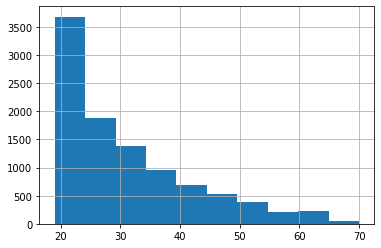

In [ ]:
df['Age'].hist() # .hist() is a class method for the pd.Series object

In [ ]:
df.head()

,Age,Gender,Country,Education,YearsCoding,PLForDataScientists,YearsML,Salary
0,52,Man,India,Bachelor’s degree,5-10 years,Python,5-10 years,"25,000-29,999"
1,52,Man,Indonesia,Master’s degree,20+ years,Python,Under 1 year,"60,000-69,999"
2,23,Man,Pakistan,Master’s degree,1-3 years,Python,I do not use machine learning methods,$0-999
3,47,Man,Mexico,Doctoral degree,20+ years,Python,5-10 years,"30,000-39,999"
4,47,Man,India,Doctoral degree,< 1 years,Python,10-20 years,"30,000-39,999"


In [ ]:
df.dtypes

Age                     int64
Gender                 object
Country                object
Education              object
YearsCoding            object
PLForDataScientists    object
YearsML                object
Salary                 object
dtype: object

Really quickly we'll do the same for `Salary`, just to give another example.

In [ ]:
df['Salary'].unique()

array(['25,000-29,999', '60,000-69,999', '$0-999', '30,000-39,999', nan,
       '15,000-19,999', '70,000-79,999', '2,000-2,999', '10,000-14,999',
       '5,000-7,499', '20,000-24,999', '1,000-1,999', '100,000-124,999',
       '7,500-9,999', '4,000-4,999', '40,000-49,999', '50,000-59,999',
       '3,000-3,999', '300,000-499,999', '200,000-249,999',
       '125,000-149,999', '250,000-299,999', '80,000-89,999',
       '90,000-99,999', '150,000-199,999', '>$1,000,000',
       '$500,000-999,999'], dtype=object)

In [ ]:
type(df['Salary'].unique()[3])

str

In [ ]:
np.nan == np.nan

False

In [ ]:
min_salary_dict = dict()
for sal in df['Salary'].unique():
  if type(sal) == str:
    conv_sal = int(sal.strip('$> ').split('-')[0].replace(',', '')) # strip and replace are methods of all String objects
    min_salary_dict[sal] = conv_sal
  if type(sal) == float: # encountered a nan
    min_salary_dict[sal] = np.nan

min_salary_dict

{'$0-999': 0,
 '$500,000-999,999': 500000,
 '1,000-1,999': 1000,
 '10,000-14,999': 10000,
 '100,000-124,999': 100000,
 '125,000-149,999': 125000,
 '15,000-19,999': 15000,
 '150,000-199,999': 150000,
 '2,000-2,999': 2000,
 '20,000-24,999': 20000,
 '200,000-249,999': 200000,
 '25,000-29,999': 25000,
 '250,000-299,999': 250000,
 '3,000-3,999': 3000,
 '30,000-39,999': 30000,
 '300,000-499,999': 300000,
 '4,000-4,999': 4000,
 '40,000-49,999': 40000,
 '5,000-7,499': 5000,
 '50,000-59,999': 50000,
 '60,000-69,999': 60000,
 '7,500-9,999': 7500,
 '70,000-79,999': 70000,
 '80,000-89,999': 80000,
 '90,000-99,999': 90000,
 '>$1,000,000': 1000000,
 nan: nan}

In [ ]:
df['MinSalary'] = df['Salary'].map(lambda salary: min_salary_dict[salary])

In [ ]:
df['MinSalary']

0       25000.0
1       60000.0
2           0.0
3       30000.0
4       30000.0
         ...   
9994        NaN
9995        NaN
9996        NaN
9997        0.0
9998        0.0
Name: MinSalary, Length: 9999, dtype: float64

That's better. Next, to see how many missing values we're working with, we can use the `.isna()` method, which returns a DataFrame of bools, and `.sum()` over each column of the resulting DataFrame:

In [ ]:
df.isna() # returns a DataFrame with all boolean entries corresponding to presence of na values

,Age,Gender,Country,Education,YearsCoding,PLForDataScientists,YearsML,Salary,MinSalary
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
9994,False,False,False,False,False,False,False,True,True
9995,False,False,False,False,False,False,False,True,True
9996,False,False,False,False,False,False,False,True,True
9997,False,False,False,False,False,False,False,False,False


In [ ]:
df.isna().sum(axis=0) # .sum() default value for axis is axis = 0, so this sums row by row. False = 0, True = 1

Age                       0
Gender                    0
Country                   0
Education                 0
YearsCoding               0
PLForDataScientists     426
YearsML                 895
Salary                 4075
MinSalary              4075
dtype: int64

To handle missing values, we can either *impute* (i.e. fill) them or simply *drop* them.

To impute missing values, we can use the [`.fillna()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.fillna.html) method with a value or method of our choice. For example, if we want to replace missing values in `PLForDataScientists` and `YearsML` with "Python" and 0 respectively, we can use:

In [ ]:
# Permanent change!
df = df.fillna({'PLForDataScientists': "Python", 'YearsML': 0})

In [ ]:
df[['PLForDataScientists', 'YearsML']].isna().sum()

PLForDataScientists    0
YearsML                0
dtype: int64

To drop missing values, we can use the `.dropna()` method, which takes several optional arguments: see the documentation [here](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.dropna.html).

For our purposes, let's just drop all rows that contain any missing values.

In [ ]:
df = df.dropna()
df.isna().sum()

Age                    0
Gender                 0
Country                0
Education              0
YearsCoding            0
PLForDataScientists    0
YearsML                0
Salary                 0
MinSalary              0
dtype: int64

In [ ]:
df

,Age,Gender,Country,Education,YearsCoding,PLForDataScientists,YearsML,Salary,MinSalary
0,52,Man,India,Bachelor’s degree,5-10 years,Python,5-10 years,"25,000-29,999",25000.0
1,52,Man,Indonesia,Master’s degree,20+ years,Python,Under 1 year,"60,000-69,999",60000.0
2,23,Man,Pakistan,Master’s degree,1-3 years,Python,I do not use machine learning methods,$0-999,0.0
3,47,Man,Mexico,Doctoral degree,20+ years,Python,5-10 years,"30,000-39,999",30000.0
4,47,Man,India,Doctoral degree,< 1 years,Python,10-20 years,"30,000-39,999",30000.0
...,...,...,...,...,...,...,...,...,...
9987,27,Man,Other,Master’s degree,5-10 years,Python,Under 1 year,$0-999,0.0
9988,47,Man,Italy,Master’s degree,5-10 years,R,2-3 years,"60,000-69,999",60000.0
9990,47,Man,France,Master’s degree,20+ years,Python,4-5 years,"90,000-99,999",90000.0
9997,23,Man,India,Master’s degree,1-3 years,Python,Under 1 year,$0-999,0.0


You might notice that the indices of our `df` didn't change after dropping all those observations! To reset them back to how they were numbered before (from 0 to `len(df)-1`), we can use `.reset_index()`:

In [ ]:
# Note: if drop = True isn't supplied, the old index becomes a column of df
df = df.reset_index(drop=True)
df

,Age,Gender,Country,Education,YearsCoding,PLForDataScientists,YearsML,Salary,MinSalary
0,52,Man,India,Bachelor’s degree,5-10 years,Python,5-10 years,"25,000-29,999",25000.0
1,52,Man,Indonesia,Master’s degree,20+ years,Python,Under 1 year,"60,000-69,999",60000.0
2,23,Man,Pakistan,Master’s degree,1-3 years,Python,I do not use machine learning methods,$0-999,0.0
3,47,Man,Mexico,Doctoral degree,20+ years,Python,5-10 years,"30,000-39,999",30000.0
4,47,Man,India,Doctoral degree,< 1 years,Python,10-20 years,"30,000-39,999",30000.0
...,...,...,...,...,...,...,...,...,...
9994,27,Woman,Germany,Master’s degree,1-3 years,Python,Under 1 year,NaN,NaN
9995,32,Man,Belarus,Doctoral degree,10-20 years,Python,5-10 years,NaN,NaN
9996,19,Man,India,Bachelor’s degree,1-3 years,Python,Under 1 year,NaN,NaN
9997,23,Man,India,Master’s degree,1-3 years,Python,Under 1 year,$0-999,0.0


## Data transformation

Finally, for the purposes of modeling, we might want to transform certain variables. Common examples of transformations include applying a mathematical operation to a numeric variable such as normalization, or converting a categorical variable to dummy variables (numeric variables of 0s and 1s for each category, a.k.a. one-hot encoding).

For example, we might want to take the logarithm of `MinSalary` to feed it into a regression model. To obtain the new column, we could run:

In [ ]:
df['log_MinSalary'] = np.log10(1 + df['MinSalary']) # np.log10() applies log10 to all elements of a specified array or list
# Note: we add 1 to df['MinSalary'] to ensure that the logarithm function doesn't break when a 0 is supplied (log(0) is undefined)
df

,Age,Gender,Country,Education,YearsCoding,PLForDataScientists,YearsML,Salary,MinSalary,log_MinSalary
0,52,Man,India,Bachelor’s degree,5-10 years,Python,5-10 years,"25,000-29,999",25000.0,4.397957
1,52,Man,Indonesia,Master’s degree,20+ years,Python,Under 1 year,"60,000-69,999",60000.0,4.778158
2,23,Man,Pakistan,Master’s degree,1-3 years,Python,I do not use machine learning methods,$0-999,0.0,0.000000
3,47,Man,Mexico,Doctoral degree,20+ years,Python,5-10 years,"30,000-39,999",30000.0,4.477136
4,47,Man,India,Doctoral degree,< 1 years,Python,10-20 years,"30,000-39,999",30000.0,4.477136
...,...,...,...,...,...,...,...,...,...,...
9994,27,Woman,Germany,Master’s degree,1-3 years,Python,Under 1 year,NaN,NaN,NaN
9995,32,Man,Belarus,Doctoral degree,10-20 years,Python,5-10 years,NaN,NaN,NaN
9996,19,Man,India,Bachelor’s degree,1-3 years,Python,Under 1 year,NaN,NaN,NaN
9997,23,Man,India,Master’s degree,1-3 years,Python,Under 1 year,$0-999,0.0,0.000000


To get dummy variables for `Education` and `Gender`, we can use the function [`pd.get_dummies()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.get_dummies.html):

In [ ]:
df = pd.get_dummies(df, columns=['Education', 'Gender'])

In [ ]:
df.head()

,Age,Country,YearsCoding,PLForDataScientists,YearsML,Salary,MinSalary,log_MinSalary,Education_Bachelor’s degree,Education_Doctoral degree,Education_I prefer not to answer,Education_Master’s degree,Education_No formal education past high school,Education_Professional doctorate,Education_Some college/university study without earning a bachelor’s degree,Gender_Man,Gender_Nonbinary,Gender_Prefer not to say,Gender_Prefer to self-describe,Gender_Woman
0,52,India,5-10 years,Python,5-10 years,"25,000-29,999",25000.0,4.397957,1,0,0,0,0,0,0,1,0,0,0,0
1,52,Indonesia,20+ years,Python,Under 1 year,"60,000-69,999",60000.0,4.778158,0,0,0,1,0,0,0,1,0,0,0,0
2,23,Pakistan,1-3 years,Python,I do not use machine learning methods,$0-999,0.0,0.000000,0,0,0,1,0,0,0,1,0,0,0,0
3,47,Mexico,20+ years,Python,5-10 years,"30,000-39,999",30000.0,4.477136,0,1,0,0,0,0,0,1,0,0,0,0
4,47,India,< 1 years,Python,10-20 years,"30,000-39,999",30000.0,4.477136,0,1,0,0,0,0,0,1,0,0,0,0


To determine whether each respondent has worked with Python, we can use list comprehension with some string operations on `PLForDataScientists` to create a new column:

In [ ]:
df['Python'] = [1 if "Python" in lang else 0 for lang in df['PLForDataScientists']]
df

,Age,Country,YearsCoding,PLForDataScientists,YearsML,Salary,MinSalary,log_MinSalary,Education_Bachelor’s degree,Education_Doctoral degree,...,Education_Master’s degree,Education_No formal education past high school,Education_Professional doctorate,Education_Some college/university study without earning a bachelor’s degree,Gender_Man,Gender_Nonbinary,Gender_Prefer not to say,Gender_Prefer to self-describe,Gender_Woman,Python
0,52,India,5-10 years,Python,5-10 years,"25,000-29,999",25000.0,4.397957,1,0,...,0,0,0,0,1,0,0,0,0,1
1,52,Indonesia,20+ years,Python,Under 1 year,"60,000-69,999",60000.0,4.778158,0,0,...,1,0,0,0,1,0,0,0,0,1
2,23,Pakistan,1-3 years,Python,I do not use machine learning methods,$0-999,0.0,0.000000,0,0,...,1,0,0,0,1,0,0,0,0,1
3,47,Mexico,20+ years,Python,5-10 years,"30,000-39,999",30000.0,4.477136,0,1,...,0,0,0,0,1,0,0,0,0,1
4,47,India,< 1 years,Python,10-20 years,"30,000-39,999",30000.0,4.477136,0,1,...,0,0,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5919,27,Other,5-10 years,Python,Under 1 year,$0-999,0.0,0.000000,0,0,...,1,0,0,0,1,0,0,0,0,1
5920,47,Italy,5-10 years,R,2-3 years,"60,000-69,999",60000.0,4.778158,0,0,...,1,0,0,0,1,0,0,0,0,0
5921,47,France,20+ years,Python,4-5 years,"90,000-99,999",90000.0,4.954247,0,0,...,1,0,0,0,1,0,0,0,0,1
5922,23,India,1-3 years,Python,Under 1 year,$0-999,0.0,0.000000,0,0,...,1,0,0,0,1,0,0,0,0,1


## With these tools, you can already do a lot of the common operations necessary to preprocess and prepare data for modeling. Congratulations!

However, there's a **LOT** we did not have the chance to cover in regards to pandas. The beautiful thing about pandas is its [documentation](https://pandas.pydata.org/docs/), which is incredibly extensive and useful. If you want to learn more advanced pandas techniques on your own, we highly recommend toying around with some of this data on your own, and reading the pandas docs to deepen your pandas knowledge and skills. You will get a lot more pandas experience as you continue through curriculum and do your own projects later on, but for now, this covers the essentials. The homework for this week will also introduce some features contained within pandas, but it is *not* exhaustive!

# Anonymous feedback

If you have any feedback for us, please let us know! The feedback form is completely anonymous, and we promise we'll take your suggestions into consideration for future meetings: https://forms.gle/eve5noVB9ccXbomM7

#Credits

Primary Contributors:
* Daniel Mendelevitch
* Nick Monozon



Secondary Contributors:
*   Sean Tjoa
*   Tristan Dewing
*   Andy Chen
*   Emily Gong
*   Tara Jaigopal

